In [47]:
import unittest
from selenium import webdriver
from selenium.webdriver import Chrome
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from selenium.common.exceptions import ElementClickInterceptedException,ElementNotInteractableException, NoSuchElementException, StaleElementReferenceException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC 
from selenium.webdriver.common.action_chains import ActionChains  
from selenium.webdriver.common.by import By
import base64
import requests
from requests.exceptions import InvalidSchema
import time
import json
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import re

In [51]:
class ScrapeGoogle(object):
    
    def __init__(self, web_root = r"C:\Users\huyia\1_jupyter\爬数据爬图片", pic_root = r"C:\Users\huyia\OneDrive\Pictures"):
        os.chdir(web_root)
        self.web_root = web_root
        self.pic_root = pic_root
        self.driver = Chrome()
        
    def __clickable(self, elem_id, typ = 'id'):
        ## wait until the button can be clicked
        driver = self.driver
        wait = WebDriverWait(driver, 10)
        actions = ActionChains(driver)
        if typ == 'id':
            element = wait.until(EC.element_to_be_clickable((By.ID, elem_id)))
        elif typ == 'path':
            element = wait.until(EC.element_to_be_clickable((By.XPATH, elem_id)))
        actions.move_to_element(element).perform()
        driver.execute_script("arguments[0].click();", element)   
    
    def __rollandclick(self, button):
        try:
            button.click()
        except (ElementClickInterceptedException, ElementNotInteractableException) as e:
            ActionChains(self.driver).key_down(Keys.DOWN).perform()
            self.__rollandclick(button)
        
    def Google_login(self, search = 'Avengers', pic_size = 'large',
                     folder = "Google Pictures",
                     url = "https://www.google.com/?&bih=937&biw=1920&hl=en"):
        driver = self.driver
        driver.get(url)
        driver.maximize_window()
        driver.implicitly_wait(5)
        os.chdir(self.pic_root)
        try:
            os.makedirs(folder)
        except FileExistsError:
            pass
        os.chdir(self.pic_root + "\\" + folder)
        ## 在Google搜索框里输入内容
        enter = "q"
        button = driver.find_element_by_name(enter)
        button.send_keys(search)
        button.send_keys(Keys.ENTER)
        ##进入图片搜索结果
        image_id = "hdtb-msb-vis"
        driver.find_element_by_id(image_id).click()
        ##tools添加筛选条件
        path = """//*[@id="yDmH0d"]/div[2]/c-wiz/div[1]/div/div[1]/div[2]/div[2]/div/div"""
        driver.find_element_by_xpath(path).click()
        ## 选择size
        size_button = """//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[2]/div/div[1]/div/div[1]"""
        self.__clickable(elem_id = size_button, typ = 'path')
        size = {"any":"""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[3]/div/span""", 
                "large":"""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[3]/div/a[1]""", 
                "medium":"""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[3]/div/a[2]""", 
                "icon":"""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[3]/div/a[3]"""}
        path = size[pic_size]
        driver.find_element_by_xpath(path).click()
        ##点击每个图片，然后从新的图片上获取link
        for i in range(65,101):
            ## 图片的预览，不可下载
            try:
                prev = driver.find_element_by_xpath(f"""//*[@id="islrg"]/div[1]/div[{i}]/a[1]/div[1]/img""")
            except NoSuchElementException:
                continue
            self.__rollandclick(prev)
            time.sleep(2)
            ## 这是可以保存的图片链接
            path = """//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img"""
            url = driver.find_element_by_xpath(path).get_attribute('src')
            time.sleep(2)
            try:
                pic = requests.get(url)
                with open(f'{i}.png', 'wb') as f:
                    f.write(pic.content)
            except InvalidSchema:
                pic = base64.b64decode(url[23:].replace("\n",""))
                with open(f'{i}.jpg', 'wb') as f:
                    f.write(pic)
        os.chdir(self.pic_root)

In [52]:
test = ScrapeGoogle()

In [53]:
test.Google_login()

NameError: name 'pic_root' is not defined

In [71]:
local_folder = os.path.abspath('.')
### 1.2store all image names\n",
jpeg = glob.glob(local_folder+"\\*.jpeg")
jpg  = glob.glob(local_folder+"\\*.jpg")
png  = glob.glob(local_folder+"\\*.png")
pictures = jpeg+jpg+png

In [72]:
os.listdir()[:10]

['10.png',
 '11.png',
 '12.png',
 '13.png',
 '14.png',
 '15.png',
 '16.png',
 '17.png',
 '18.png',
 '19.png']

In [73]:
import matplotlib.image as mpimg
for pic in pictures:
    picd = plt.imread(pic,0)
    vert, hori = picd.shape[:2]
    size = os.path.getsize(pic)/1024
    if size < 200:
        ## 小于200KB的图片就删掉
        os.remove(pic)


UnidentifiedImageError: cannot identify image file 'C:\\Users\\huyia\\OneDrive\\Pictures\\Google Pictures\\42.png'

''
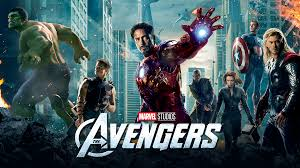

In [17]:
driver = test.driver
path = """//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img"""
url = driver.find_element_by_xpath(path).get_attribute('src')
url

In [20]:
url.index(",")

22

In [21]:
len("data:image/jpeg;base64")

22

In [23]:
import base64
pic = base64.b64decode(url[23:].replace("\n",""))

In [27]:
with open(f'100.jpg', 'wb') as f:
    f.write(pic)

In [30]:
## 打开tools
driver.find_element_by_xpath("""//*[@id="yDmH0d"]/div[2]/c-wiz/div[1]/div/div[1]/div[2]/div[2]/div""").click()

In [31]:
## 选择size
driver.find_element_by_xpath("""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[2]/div/div[1]/div/div[1]""").click()

In [32]:
size = {'any':"""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[3]/div/span""", 
       "large":"""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[3]/div/a[1]""", 
       "medium":"""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[3]/div/a[2]""", 
       "icon":"""//*[@id="yDmH0d"]/div[2]/c-wiz/div[2]/c-wiz[1]/div/div/div[3]/div/a[3]"""}
path = size['large']
driver.find_element_by_xpath(path).click()


In [47]:
for i in range(1,200):
    if i%50 == 0:
        driver.execute_script(f"var q=document.documentElement.scrollTop={i*50}")
    picture = driver.find_element_by_xpath(f"""//*[@id="islrg"]/div[1]/div[{i}]/a[1]/div[1]/img""")
    picture.click()
    picture_path = """//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img"""
    
    

In [45]:
cnt = 1
for picture in pictures:
    print(picture)
    """pic = requests.get(url)
    with open(f'{cnt}.jpg', 'wb') as f:
        f.write(pic.content)
    cnt += 1"""


In [65]:

pictures = driver.find_elements_by_class_name("rg_i Q4LuWd tx8vtf")

In [59]:
url = pictures.get_attribute('href')
pic = requests.get(url)
with open(f'{cnt}.jpg', 'wb') as f:
    f.write(pic.content)
cnt += 1

In [67]:
len(pictures)

0

In [68]:
i = 1
picture = driver.find_element_by_xpath(f"""//*[@id="islrg"]/div[1]/div[{i}]/a[1]/div[1]/img""")
picture.click()

In [70]:
path = """//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img"""
path = """//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div[1]/div[1]/div/div[2]/a/img"""
url = driver.find_element_by_xpath(path).get_attribute('src')
pic = requests.get(url)
with open(f'{cnt}.jpg', 'wb') as f:
    f.write(pic.content)